Let's start looking at colorspace transforms with HSV

In [1]:
# Starting with the usual imports
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import cv2
from PIL import Image

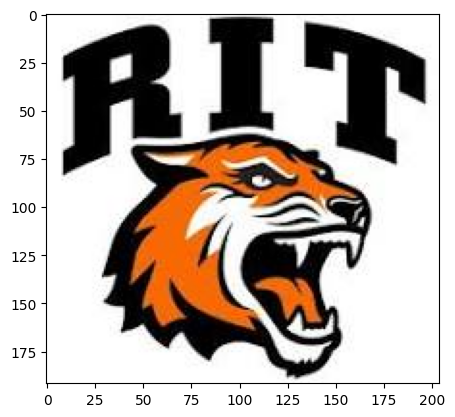

In [2]:
# Load the RIT image
baseImg = cv2.imread('RIT.jpg')
rgb = cv2.cvtColor(baseImg, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

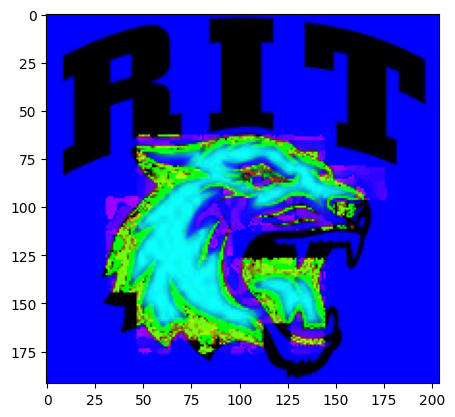

In [3]:
# Let openCV convert for us
baseImg = cv2.imread('RIT.jpg')
img = cv2.cvtColor(baseImg, cv2.COLOR_BGR2HSV)
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..357.14285].


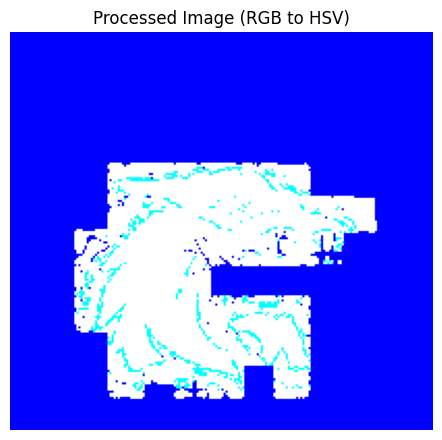

In [4]:
# Can we do this manually?
baseImg = cv2.imread('RIT.jpg')
# Split the image into Blue, Green, and Red channels
b, g, r = cv2.split(baseImg)

# Calculate element-wise maximum and minimum of r, g, and b
cmax = np.maximum(np.maximum(r, g), b)  # maximum of r, g, b
cmin = np.minimum(np.minimum(r, g), b)  # minimum of r, g, b

# Calculate the difference between cmax and cmin
diff = cmax - cmin

# Initialize the saturation array (s) with the same shape as cmax
s = np.zeros_like(cmax, dtype=np.float32)

# Create a mask for cmax == 0 (this will give s = 0)
mask = cmax == 0
# Set saturation to 0 where cmax is 0
s[mask] = 0

# For all other values of cmax (where cmax != 0), compute saturation
mask_non_zero = ~mask
s[mask_non_zero] = (diff[mask_non_zero] / cmax[mask_non_zero]) * 255

# Initialize the hue array (h) with the same shape as cmax
h = np.zeros_like(cmax, dtype=np.float32)

# Compute hue based on the maximum channel
# Check if cmax equals cmin (this would give h = 0)
mask_h = cmax == cmin
h[mask_h] = 0

# If cmax equals r, compute h
mask_h = (cmax == r) & (cmax != cmin)
h[mask_h] = (60 * ((g[mask_h] - b[mask_h]) / diff[mask_h]) + 360) % 360

# If cmax equals g, compute h
mask_h = (cmax == g) & (cmax != cmin)
h[mask_h] = (60 * ((b[mask_h] - r[mask_h]) / diff[mask_h]) + 120) % 360

# If cmax equals b, compute h
mask_h = (cmax == b) & (cmax != cmin)
h[mask_h] = (60 * ((r[mask_h] - g[mask_h]) / diff[mask_h]) + 240) % 360

# Ok, we took the very long way around. What does our manually 
# Convert the hue and saturation to an image
# Note: You need to convert the hue and saturation to proper color format to visualize them
hsv_image = np.stack([h, s, np.full_like(h, 255, dtype=np.float32)], axis=-1)
rgb_image = cv2.cvtColor(hsv_image.astype(np.uint8), cv2.COLOR_HSV2RGB)

# Plot the processed image
plt.figure(figsize=(12, 6))
# Processed Image in HSV
plt.subplot(1, 2, 2)
plt.title('Processed Image (RGB to HSV)')
plt.imshow(hsv_image)
plt.axis('off')
plt.show()

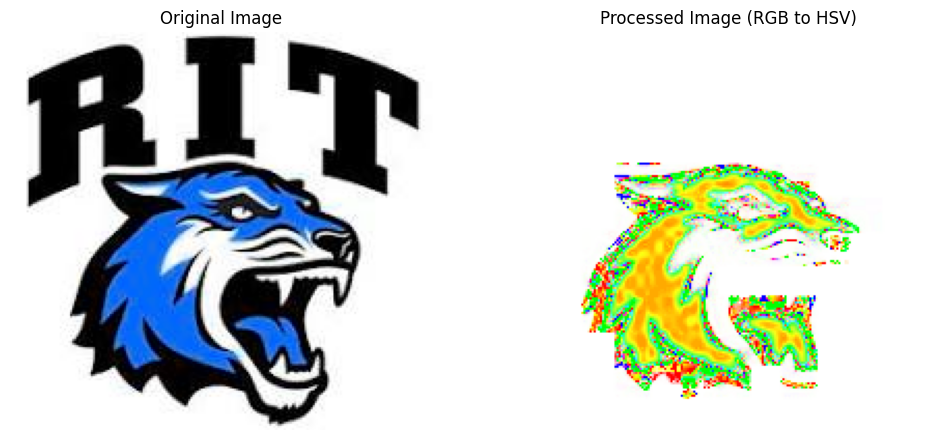

In [5]:
# Fix [r,g,b] color space
baseImg = cv2.imread('RIT.jpg')
img = cv2.cvtColor(baseImg, cv2.COLOR_BGR2RGB)

# Split the image into Blue, Green, and Red channels
b, g, r = cv2.split(img)

# Calculate element-wise maximum and minimum of r, g, and b
cmax = np.maximum(np.maximum(r, g), b)  # maximum of r, g, b
cmin = np.minimum(np.minimum(r, g), b)  # minimum of r, g, b

# Calculate the difference between cmax and cmin
diff = cmax - cmin

# Initialize the saturation array (s) with the same shape as cmax
s = np.zeros_like(cmax, dtype=np.float32)

# Create a mask for cmax == 0 (this will give s = 0)
mask = cmax == 0
# Set saturation to 0 where cmax is 0
s[mask] = 0

# For all other values of cmax (where cmax != 0), compute saturation
mask_non_zero = ~mask
s[mask_non_zero] = (diff[mask_non_zero] / cmax[mask_non_zero]) * 255

# Initialize the hue array (h) with the same shape as cmax
h = np.zeros_like(cmax, dtype=np.float32)

# Compute hue based on the maximum channel
# Check if cmax equals cmin (this would give h = 0)
mask_h = cmax == cmin
h[mask_h] = 0

# If cmax equals r, compute h
mask_h = (cmax == r) & (cmax != cmin)
h[mask_h] = (60 * ((g[mask_h] - b[mask_h]) / diff[mask_h]) + 360) % 360

# If cmax equals g, compute h
mask_h = (cmax == g) & (cmax != cmin)
h[mask_h] = (60 * ((b[mask_h] - r[mask_h]) / diff[mask_h]) + 120) % 360

# If cmax equals b, compute h
mask_h = (cmax == b) & (cmax != cmin)
h[mask_h] = (60 * ((r[mask_h] - g[mask_h]) / diff[mask_h]) + 240) % 360

# Ok, we took the very long way around. What does our manually 
# Convert the hue and saturation to an image
# Note: You need to convert the hue and saturation to proper color format to visualize them
hsv_image = np.stack([h, s, np.full_like(h, 255, dtype=np.float32)], axis=-1)
rgb_image = cv2.cvtColor(hsv_image.astype(np.uint8), cv2.COLOR_HSV2RGB)

# Plot the original and processed image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(baseImg)
plt.axis('off')

# Processed Image (in RGB)
plt.subplot(1, 2, 2)
plt.title('Processed Image (RGB to HSV)')
plt.imshow(rgb_image)
plt.axis('off')

plt.show()

Hmm, that still doesn't seem right...
Let's try again.


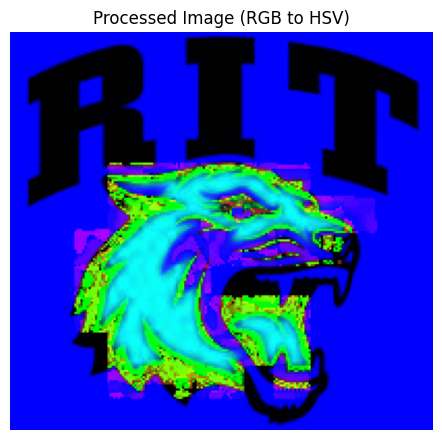

In [6]:
bgr_image = cv2.imread('RIT.jpg')
height, width, _ = bgr_image.shape 

# Create an empty array for the HSV image
hsv_image = np.zeros((height, width, 3), dtype=np.uint8)

# Iterate over each pixel
for i in range(height):
    for j in range(width):
        # Get the B, G, R components and normalize them to [0, 1]
        # We missed this step in the last version
        b = bgr_image[i, j, 0] / 255.0
        g = bgr_image[i, j, 1] / 255.0
        r = bgr_image[i, j, 2] / 255.0

        # Calculate C_max, C_min, and Delta
        c_max = max(r, g, b)
        c_min = min(r, g, b)
        delta = c_max - c_min

        # Hue calculation
        if delta == 0:
            h = 0
        elif c_max == r:
            h = 60 * (((g - b) / delta) % 6)
        elif c_max == g:
            h = 60 * (((b - r) / delta) + 2)
        elif c_max == b:
            h = 60 * (((r - g) / delta) + 4)

        # Saturation calculation
        s = 0 if c_max == 0 else (delta / c_max)
        # Value calculation
        v = c_max

        # Scale the hue to [0, 179], saturation and value to [0, 255]
        h = int(h / 2) if h >= 0 else int((h + 360) / 2)  # OpenCV uses 0-179 for hue
        s = int(s * 255)
        v = int(v * 255)

        # Set the HSV values to the image
        hsv_image[i, j] = [h, s, v]

# Plot the processed image
plt.figure(figsize=(12, 6))
# Processed Image in HSV
plt.subplot(1, 2, 2)
plt.title('Processed Image (RGB to HSV)')
plt.imshow(hsv_image)
plt.axis('off')
plt.show()

Ok, we got there. Manipulating image at the pixel level lets us to a lot of cool stuff, but it also requires us to remember a lot of minor details.
It's easy to skip steps when moving between colorspaces.
Let's look at HSI and HSL.